In [4]:
# Import necessary libraries for data manipulation and visualization
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [5]:
# Load the sales data from a CSV file
# The 'Date' column is parsed as a datetime object
sales = pd.read_csv(
    './Sales_Data.csv',
    parse_dates=['Date'])

In [31]:
# Display the first 5 rows of the dataset
sales.head()

,Date,Customer_ID,Region,Sales_Rep,Product_ID,Product_Name,Category,Units_Sold,Unit_Price,Revenue,Cost,Profit
0,2024-11-30,CUST8872,South,Charlie,P006,Tablet,Electronics,17,512.16,8706.72,7029.68,1677.04
1,2024-07-18,CUST6628,South,Alice,P006,Tablet,Electronics,14,584.24,8179.36,5884.69,2294.67
2,2024-08-10,CUST9577,South,Charlie,P006,Tablet,Electronics,17,406.45,6909.65,4978.84,1930.81
3,2024-03-31,CUST5225,East,Alice,P003,Monitor,Electronics,7,279.34,1955.38,1484.94,470.44
4,2024-02-25,CUST3008,East,Alice,P005,Mouse,Accessories,13,20.91,271.83,173.90,97.93


In [ ]:
# Check the shape of the dataset (number of rows and columns)
sales.shape

(5000, 12)

In [ ]:
# Display summary information about the dataset, including data types and non-null counts
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          5000 non-null   datetime64[ns]
 1   Customer_ID   5000 non-null   object        
 2   Region        5000 non-null   object        
 3   Sales_Rep     5000 non-null   object        
 4   Product_ID    5000 non-null   object        
 5   Product_Name  5000 non-null   object        
 6   Category      5000 non-null   object        
 7   Units_Sold    5000 non-null   int64         
 8   Unit_Price    5000 non-null   float64       
 9   Revenue       5000 non-null   float64       
 10  Cost          5000 non-null   float64       
 11  Profit        5000 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(6)
memory usage: 468.9+ KB


In [ ]:
# Generate descriptive statistics for numeric columns
# Includes count, mean, min, 25% (Q1), 50% (median), 75% (Q3), max, and standard deviation
sales.describe()

,Date,Units_Sold,Unit_Price,Revenue,Cost,Profit
count,5000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2024-06-29 03:52:24.959999744,10.635200,413.781192,4401.541998,3188.245590,1213.296408
min,2024-01-01 00:00:00,1.000000,15.010000,15.010000,9.230000,2.780000
25%,2024-04-01 00:00:00,6.000000,44.775000,501.090000,357.557500,128.905000
50%,2024-06-29 00:00:00,11.000000,295.610000,2304.845000,1667.410000,600.060000
75%,2024-09-26 00:00:00,16.000000,694.785000,6927.410000,4972.262500,1828.695000
max,2024-12-30 00:00:00,20.000000,1199.850000,23574.400000,18619.290000,8945.570000
std,NaN,5.731587,364.961802,5053.048978,3694.167798,1468.339760


In [30]:
# Generate the correlation matrix to measure the linear relationship between all numerical columns in the dataset.
# A correlation value close to 1 indicates a strong positive relationship, while values near -1 indicate a strong negative relationship.
# Values close to 0 suggest no linear correlation between the variables.

# From the matrix, we can observe that 'Revenue' has a strong positive correlation with 'Cost' and 'Profit',
# while 'Units_Sold' has little to no correlation with 'Unit_Price'.

corr = sales.select_dtypes(include='number').corr()
corr

,Units_Sold,Unit_Price,Revenue,Cost,Profit
Units_Sold,1.000000,0.000429,0.468477,0.462934,0.447501
Unit_Price,0.000429,1.000000,0.780532,0.775254,0.735626
Revenue,0.468477,0.780532,1.000000,0.991711,0.946309
Cost,0.462934,0.775254,0.991711,1.000000,0.896928
Profit,0.447501,0.735626,0.946309,0.896928,1.000000


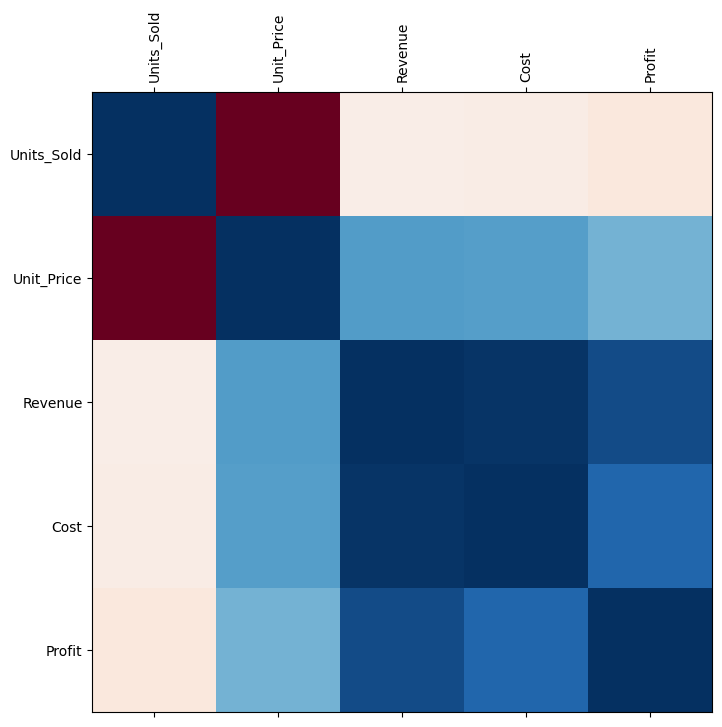

In [31]:
# Generate the correlation matrix to visualize how numerical columns relate to each other.
# In this color map ('RdBu'), dark blue indicates a strong positive correlation,
# dark red indicates a strong negative correlation,
# and colors closer to white show weak or no correlation between variables.

fig = plt.figure(figsize=(8,8))
plt.matshow(corr, cmap='RdBu', fignum=fig.number)
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical'); 
plt.yticks(range(len(corr.columns)), corr.columns);

In [ ]:
# Generate descriptive statistics for the 'Revenue' column
# Includes count, mean, standard deviation, min, 25% (Q1), 50% (median), 75% (Q3), and max
sales['Revenue'].describe()

count     5000.000000
mean      4401.541998
std       5053.048978
min         15.010000
25%        501.090000
50%       2304.845000
75%       6927.410000
max      23574.400000
Name: Revenue, dtype: float64

<Axes: >

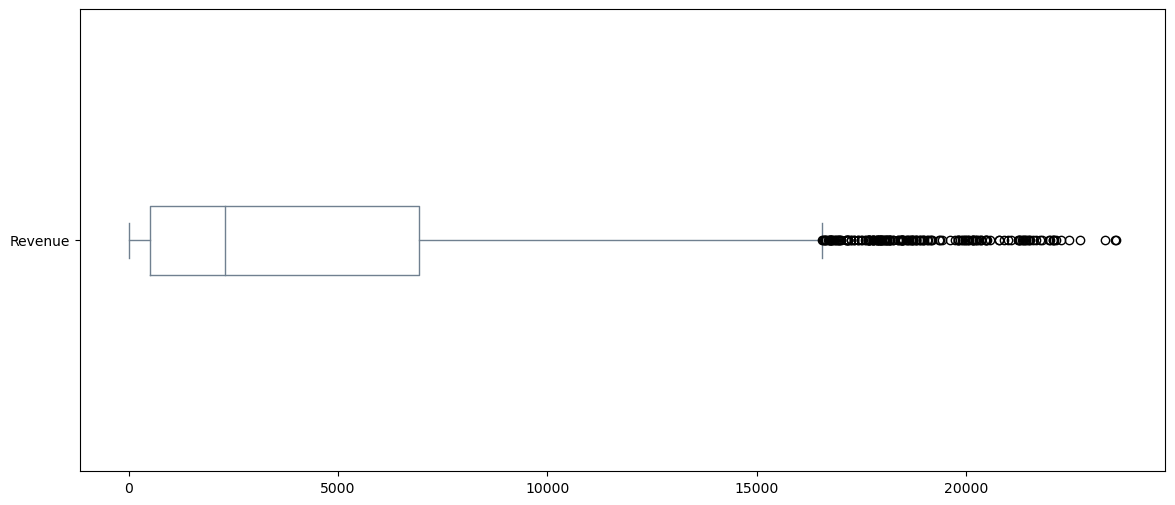

In [39]:
# Revenue Distribution - Boxplot

# This boxplot visualizes the distribution of revenue in the dataset. As we can see, the data is **right-skewed**, meaning most transactions have lower revenue values, while a few high-revenue transactions act as **outliers**.

# **Insights:**
# - The **median** revenue is closer to the lower quartile, indicating a skewed distribution.
# - There are many **outliers**, suggesting occasional high-value sales—these may need special attention or separate analysis.
# - Because of the outliers, the **mean** may not accurately represent the central tendency of revenue—**the median** is a better metric in this case.


sales['Revenue'].plot(kind='box', vert= False, figsize=(14,6), color = 'slategray')

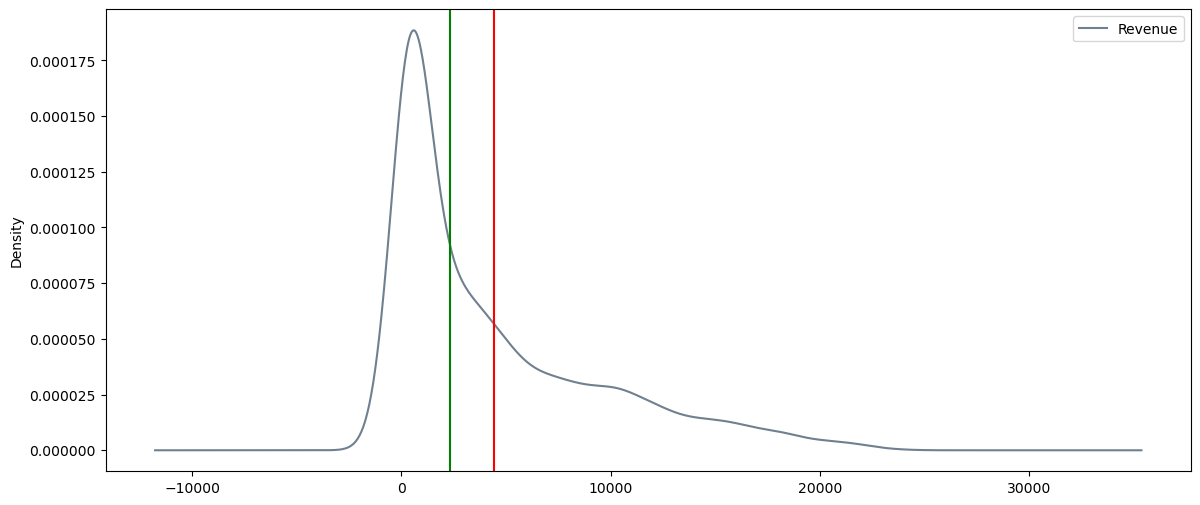

In [40]:
# Revenue Distribution - Density Plot

# This density plot shows the distribution of revenue in the dataset. The curve is **right-skewed**, meaning the majority of transactions have relatively low revenue, while a few transactions generate significantly higher revenue.

# The **red vertical line** represents the **mean**, and the **green vertical line** represents the **median**.

# **Insights:**
# - Most revenue values fall between **0 and around 10,000**, as seen from the peak of the density curve.
# - The **distribution is not symmetrical**—it has a long tail to the right, indicating the presence of **high-revenue outliers**.
# - The **mean** (red line) is higher than the **median** (green line), due to the influence of large revenue values.
# - This pattern suggests that while most sales are of lower value, a few high-value transactions significantly impact the overall revenue distribution.
# - Revenue values below zero also appear in the dataset, which may represent **refunds or data issues** and should be reviewed.

ax = sales['Revenue'].plot(kind='density', figsize=(14,6), color='slategray')
ax.axvline(sales['Revenue'].mean(), color='red')
ax.axvline(sales['Revenue'].median(), color='green')
ax.legend()

Text(0.5, 0, 'Dollars')

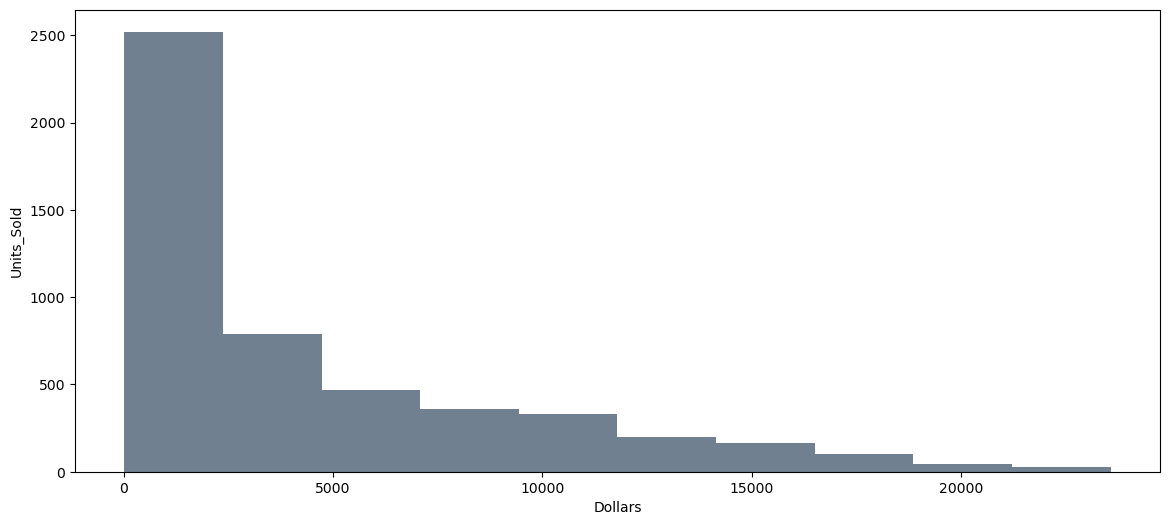

In [38]:
# Revenue Distribution - Histogram

# This histogram visualizes how frequently different revenue values occur in the dataset. The data is clearly **right-skewed**, with most transactions generating relatively low revenue, and fewer transactions at higher revenue ranges.

# **Insights:**
# - The **majority of transactions** have revenue under **$5,000**, as shown by the tall bar on the left.
# - As revenue increases, the **frequency of transactions drops significantly**, forming a long tail to the right.
# - This supports what we saw in the density plot and boxplot: **a few high-value transactions are outliers**.
# - The skewed distribution suggests that **revenue is not evenly distributed** across all sales—most are low, with occasional spikes.
# - This pattern may indicate a **small number of big-ticket items or bulk purchases**, which can be analyzed separately for strategic insights.

ax = sales['Revenue'].plot(kind='hist', figsize=(14,6), color='slategray')
ax.set_ylabel('Units_Sold')
ax.set_xlabel('Dollars')

In [78]:
# Generate the number of sales (transactions) for each region in the dataset

sales['Region'].value_counts()

Region
South    1278
West     1274
East     1226
North    1222
Name: count, dtype: int64

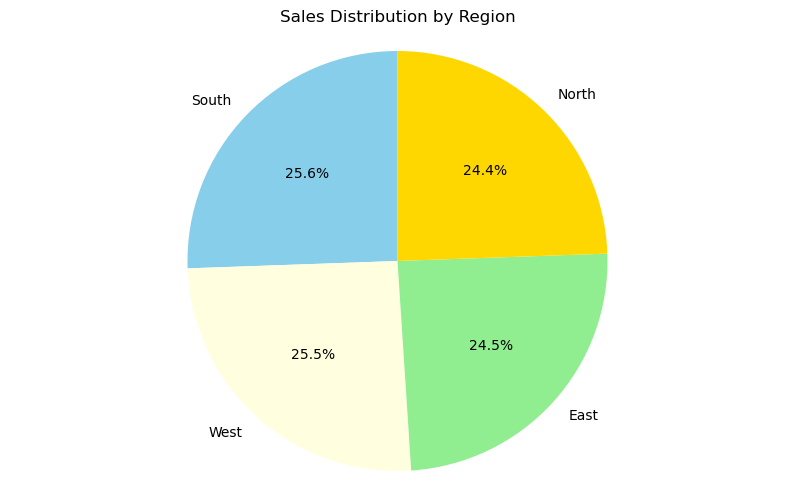

In [ ]:
# Generate a pie chart to visualize the percentage of sales by region.
# The South region contributes the highest share (25.6%), followed closely by the West, East, and North.
# The distribution appears fairly even across all four regions.

region_counts = sales['Region'].value_counts()

plt.figure(figsize = (10,6))
plt.pie(
    region_counts,
    labels = region_counts.index,
    colors = ['skyblue', 'lightyellow', 'lightgreen', 'gold'],  
    startangle = 90,
    autopct = '%1.1f%%')

plt.title('Sales Distribution by Region')
plt.axis('equal') 
plt.show()

Text(0, 0.5, 'Number of Sales')

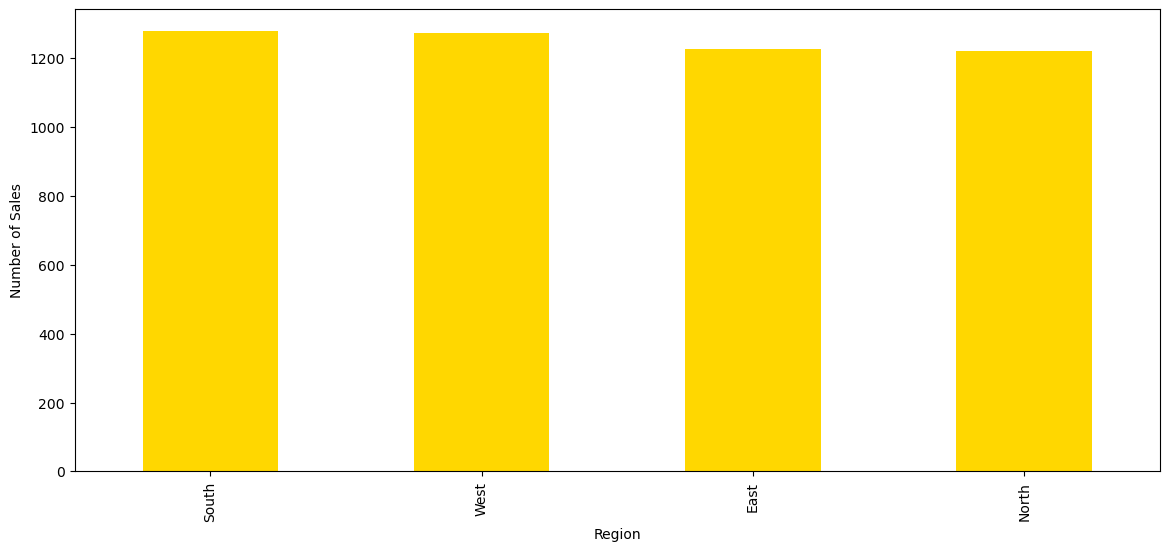

In [41]:
# To better understand how sales are distributed across different regions,
# this bar chart shows the exact number of sales per region.
# Compared to a pie chart, this gives a clearer view of differences in sales volume.

ax = sales['Region'].value_counts().plot(kind='bar', figsize=(14,6), color = 'gold')
ax.set_ylabel('Number of Sales')

In [ ]:
# Calculate the median Revenue for each Region.
# The South region has the highest median Revenue (2,603.495),
# while the West region has the lowest (2,020.810).

sales.groupby('Region')['Revenue'].median()

Region
East     2229.980
North    2367.200
South    2603.495
West     2020.810
Name: Revenue, dtype: float64

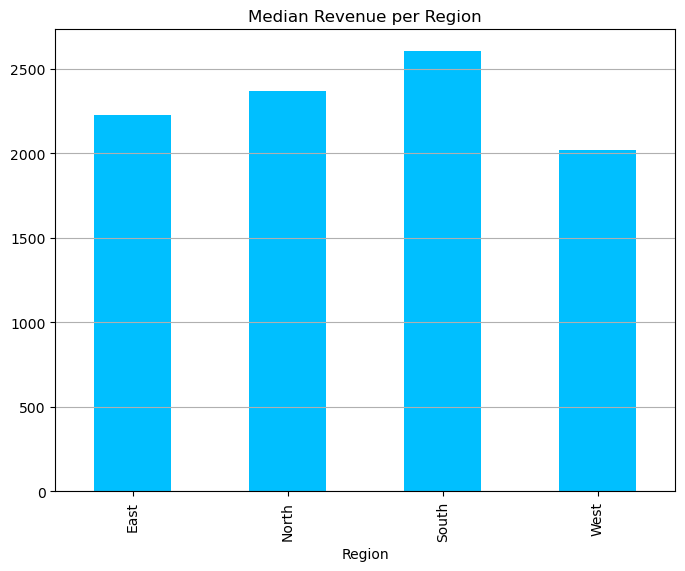

In [ ]:
# This bar chart shows the median Revenue generated in each Region.
# Using the median (instead of the average) helps provide a more accurate view of central Revenue trends 
# by reducing the impact of extreme outliers (very high or very low values).

sales.groupby('Region')['Revenue'].median().plot(
    kind = 'bar',
    color = 'deepskyblue',
    figsize = (8,6),
    title = 'Median Revenue per Region'
)

plt.ylabel = 'Revenue'
plt.xlabel = 'Region'
plt.grid(axis = 'y')
plt.show()

<Axes: xlabel='Region', ylabel='Revenue'>

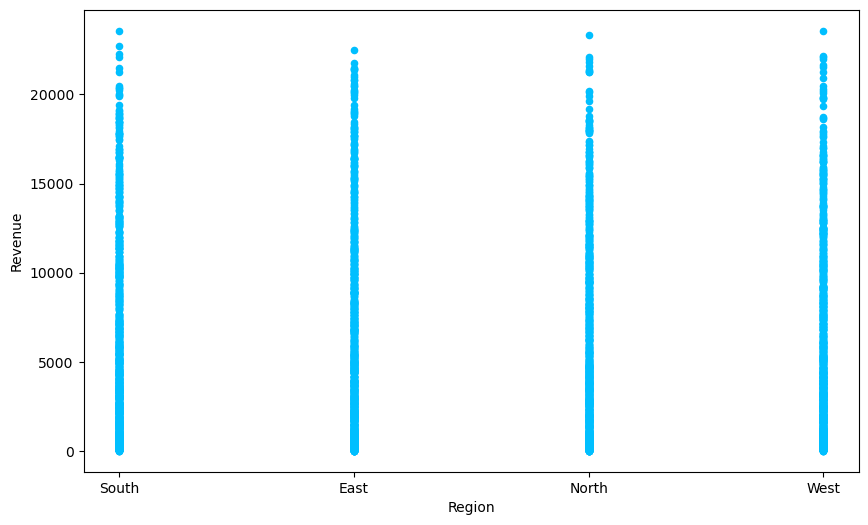

In [ ]:
# Visualize a scatter plot to show how Revenue is distributed across different Regions.

# All four Regions (South, East, North, West) show a fairly even spread of Revenue values.
# The majority of points are clustered toward the bottom of the plot, indicating that most sales generate smaller to mid-range Revenue.

sales.plot(kind = 'scatter', x = 'Region', y = 'Revenue', figsize=(10,6), color = 'deepskyblue')

<Axes: xlabel='Revenue', ylabel='Profit'>

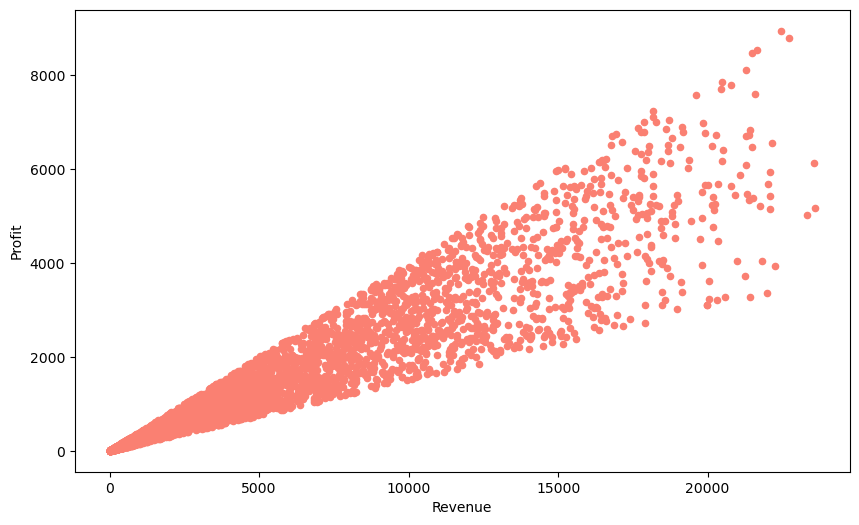

In [ ]:
# This scatter plot visualizes the relationship between Revenue and Profit. 
# Each dot represents a single transaction, showing how much revenue it generated and the resulting profit.

# The plot shows a strong positive correlation — as revenue increases, profit tends to increase as well.

sales.plot(kind = 'scatter', x = 'Revenue', y = 'Profit', figsize = (10,6), color = 'salmon')

Text(0, 0.5, 'Profit')

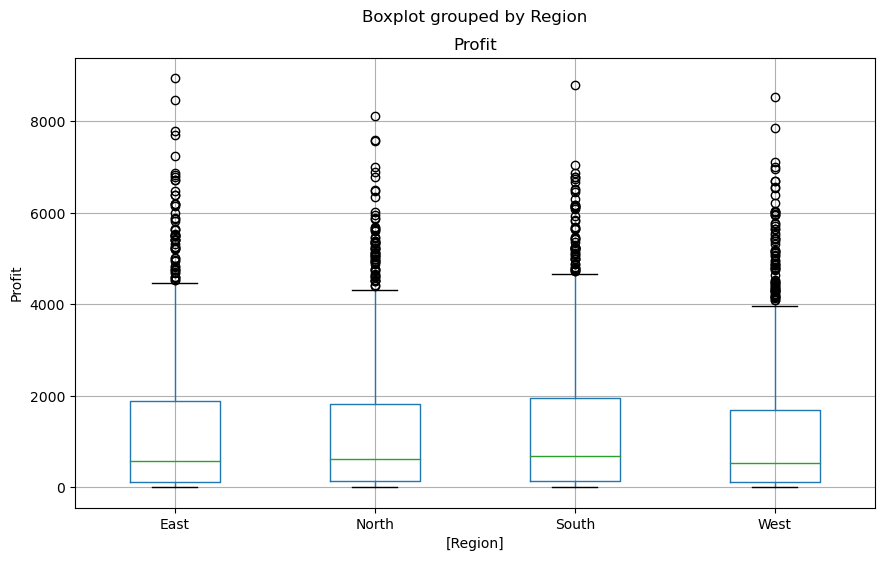

In [ ]:
# Visualize the box plot of the Profit grouped by Region
# This box plot shows the distribution of profit in each region

# The box represents the interquartile range (IQR), where 50% of the data falls.
# The green line inside the box is the median profit.
# The whiskers show the range of the bulk of the data.
# The dots above the whiskers are outliers — unusually high-profit transactions.

# The distribution of profit looks fairly similar across regions.
# All regions show a significant number of outliers, which may indicate high-profit opportunities or anomalies.
# Median profit is quite low relative to the range, suggesting a right-skewed distribution.

ax = sales[['Profit', 'Region']].boxplot(by = 'Region', figsize = (10,6))
ax.set_ylabel('Profit')

In [ ]:
# Calculate the median Profit for each Region.
# The South region has the highest median Profit (680.480),
# while the West region has the lowest (528.290).

sales.groupby('Region')['Profit'].median()

Region
East     580.995
North    619.945
South    680.480
West     528.290
Name: Profit, dtype: float64

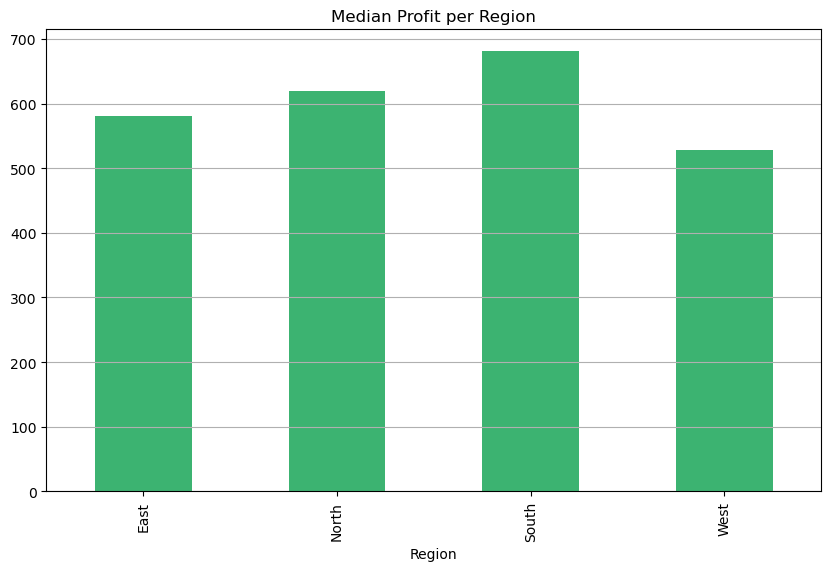

In [ ]:
# This bar chart shows the median Profit generated in each Region.
# Using the median (instead of the average) helps provide a more accurate view of central Profit trends 
# by reducing the impact of extreme outliers (very high or very low values).

sales.groupby('Region')['Profit'].median().plot( 
    kind = 'bar',
    color = 'mediumseagreen', 
    figsize = (10,6), 
    title = 'Median Profit per Region'
)
plt.xlabel = 'Region'
plt.ylabel = 'Revenue'
plt.grid(axis = 'y')
plt.show()

<Axes: xlabel='Region', ylabel='Profit'>

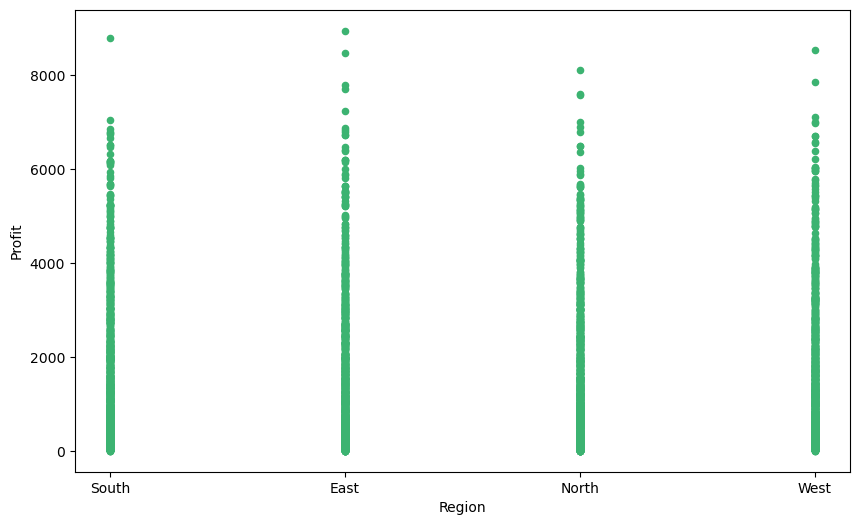

In [ ]:
# Visualize a scatter plot to show how Profit is distributed across different Regions.

# All four Regions (South, East, North, West) show a fairly even spread of revenue values.
# The majority of points are clustered toward the bottom of the plot, indicating that most sales generate smaller to mid-range Profit.

sales.plot(kind = 'scatter', x = 'Region', y = 'Profit', color = 'mediumseagreen', figsize = (10,6))